**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['sentiment'].values

In [4]:
file_path = '/content/IMDB Dataset.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [5]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = np.where(data == 'positive', 1, 0)
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [8]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        X.append(a)
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)
X, y = create_dataset(data, time_step)

In [9]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [10]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [11]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [12]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=15, batch_size=50, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 57s 129ms/step - loss: 0.5005
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 75s 111ms/step - loss: 0.4978
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 85s 118ms/step - loss: 0.5008
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 53s 132ms/step - loss: 0.4998
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 74s 113ms/step - loss: 0.4992
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - loss: 0.5029
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 49s 123ms/step - loss: 0.5018
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 45s 111ms/step - loss: 0.5007
Epoch 9/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 88s 127ms/step - loss: 0.5019
Epoch 10/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - loss: 0.5002
Epoch 11/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - loss: 0.5016
Epoch 12/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - loss: 0.5017
Epoch 13/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - loss: 0.4989
Epoch 14/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - loss: 0.5009
Epoch 15/20
400

In [13]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [14]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

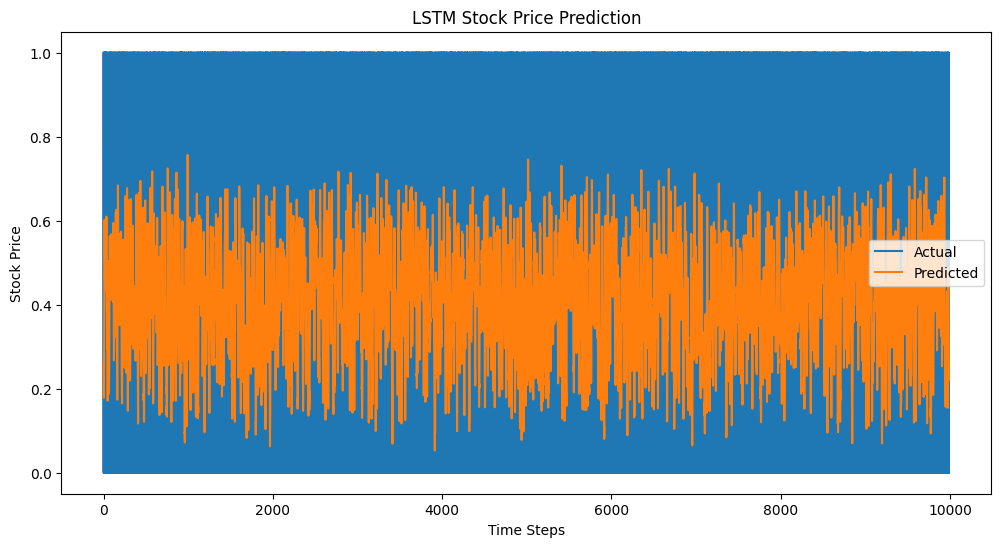

In [15]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?

Normalizing the 'Close' prices involves scaling them down to a range between, say 0 and 1. This makes learning and working easier for the LSTM model. It helps speed up model training and also prevents problems that might pop up when numbers get too big or too different from each other.

2.	What is the purpose of the Dropout layer in the LSTM model?

The Dropout layer is a way of regularization, so that the model does not overfit by learning too much from the training data, which is not doing well on new data. On this ground, the Dropout layer during training randomly turns parts of the model off, making the model learn to be more flexible and better at making predictions on new data.

3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?

 If the predicted line closely follows the actual line, it means the model is doing a good job at predicting the stock prices. The model has learned the patterns well, so its predictions are very close to the real prices.y
